In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
responses = pd.read_csv('responses.csv')


In [81]:
responses.head()

,Timestamp,"Do you prefer to study in the morning, afternoon, or evening?",How often do you exercise or engage in physical activity each week? (hours in number)\nIts ok to say 0 like me,Do you play video games?,Do you watch movies or TV shows regularly?,"If you watch movies or TV shows, what genre(s) do you prefer?",How many hours of sleep do you usually get each night? (hours in number),How often do you use social media each day? (hours in number),extracurricular_hours,How often do you attend classes?,Do you usually study alone or with others?,How often do you seek help from professors or teaching assistants?,"Do you use any study aids, such as flashcards or study guides?",How often do you attend office hours or tutoring sessions?,Do you have a part-time job or internship?,How do you usually commute to campus?,How often do you meet with academic advisors?,"On average, how many hours do you study each day? (hours in number)",naps,What is your current CGPA?
0,3/15/2023 14:43:50,Evening,5.0,Yes,Yes,Action,5.0,6.0,3.0,Mostly,Alone,Sometimes,No,Never,No,Walk,Sometimes,3.0,Yes,3.15
1,3/15/2023 16:03:58,Evening,0.0,No,Yes,Science Fiction,5.0,5.0,2.0,Mostly,Alone,Sometimes,No,Sometimes,No,Walk,Sometimes,3.0,Yes,3.40
2,3/15/2023 16:06:37,Evening,15.0,No,Yes,Drama,10.0,5.0,2.0,Always,With Friends,Sometimes,No,Never,No,Walk,Sometimes,2.0,Yes,3.00
3,3/15/2023 16:18:59,Evening,0.0,Yes,Yes,Action,3.0,0.0,15.0,Mostly,Alone,Never,No,Never,Yes,Public Transport,Sometimes,5.0,No,3.73
4,3/15/2023 17:51:19,Evening,1.0,Yes,Yes,Action,8.0,5.0,10.0,Always,Alone,Sometimes,Yes,Sometimes,No,Walk,Sometimes,3.0,No,3.20


In [82]:
# Create a dictionary of column name mappings
column_names = {

    'Do you prefer to study in the morning, afternoon, or evening?': 'study_time',

    'What is your current CGPA?': 'CGPA',
    'On average, how many hours do you study each day? (hours in number)': 'study_hours',
    'How often do you exercise or engage in physical activity each week? (hours in number)\nIts ok to say 0 like me': 'exercise_frequency',
    'Do you play video games?': 'play_video_games',
    'Do you watch movies or TV shows regularly?': 'watch_tv',
    'If you watch movies or TV shows, what genre(s) do you prefer?': 'tv_genre',
    'How many hours of sleep do you usually get each night? (hours in number)': 'sleep_hours',
    'How often do you use social media each day? (hours in number)': 'social_media_frequency',
    'How many hours per week do you spend on extracurricular activities (such as sports, music, or volunteering) (hours in number) ?': 'extracurricular_hours',
    'How often do you attend classes?': 'class_attendance',
    'Do you usually study alone or with others?': 'study_alone',
    'How often do you seek help from professors or teaching assistants?': 'help_frequency',
    'Do you use any study aids, such as flashcards or study guides?': 'use_study_aids',
    'How often do you attend office hours or tutoring sessions?': 'office_hours_attendance',
    'Do you have a part-time job or internship?': 'part_time_job',
    'How do you usually commute to campus?': 'commute_method',
    'How often do you meet with academic advisors?': 'advisor_meetings',
    'naps': 'study_breaks'
}
# Rename the column names using the dictionary
responses = responses.rename(columns=column_names)

# Display the first five rows of the renamed DataFrame
responses.head()

,Timestamp,study_time,exercise_frequency,play_video_games,watch_tv,tv_genre,sleep_hours,social_media_frequency,extracurricular_hours,class_attendance,study_alone,help_frequency,use_study_aids,office_hours_attendance,part_time_job,commute_method,advisor_meetings,study_hours,study_breaks,CGPA
0,3/15/2023 14:43:50,Evening,5.0,Yes,Yes,Action,5.0,6.0,3.0,Mostly,Alone,Sometimes,No,Never,No,Walk,Sometimes,3.0,Yes,3.15
1,3/15/2023 16:03:58,Evening,0.0,No,Yes,Science Fiction,5.0,5.0,2.0,Mostly,Alone,Sometimes,No,Sometimes,No,Walk,Sometimes,3.0,Yes,3.40
2,3/15/2023 16:06:37,Evening,15.0,No,Yes,Drama,10.0,5.0,2.0,Always,With Friends,Sometimes,No,Never,No,Walk,Sometimes,2.0,Yes,3.00
3,3/15/2023 16:18:59,Evening,0.0,Yes,Yes,Action,3.0,0.0,15.0,Mostly,Alone,Never,No,Never,Yes,Public Transport,Sometimes,5.0,No,3.73
4,3/15/2023 17:51:19,Evening,1.0,Yes,Yes,Action,8.0,5.0,10.0,Always,Alone,Sometimes,Yes,Sometimes,No,Walk,Sometimes,3.0,No,3.20


In [83]:
responses.dropna(inplace=True)
responses = responses[['CGPA', 'study_hours', 'study_time', 'exercise_frequency', 'play_video_games', 'watch_tv', 'tv_genre', 'sleep_hours', 'social_media_frequency', 'extracurricular_hours', 'class_attendance', 'study_alone', 'help_frequency', 'use_study_aids', 'office_hours_attendance', 'part_time_job', 'commute_method']]


In [84]:
responses['study_time'] = pd.Categorical(responses['study_time'], categories=['Morning', 'Afternoon', 'Evening'], ordered=True)
responses['play_video_games'] = pd.Categorical(responses['play_video_games'], categories=['Yes', 'No'], ordered=True)
responses['watch_tv'] = pd.Categorical(responses['watch_tv'], categories=['Yes', 'No'], ordered=True)


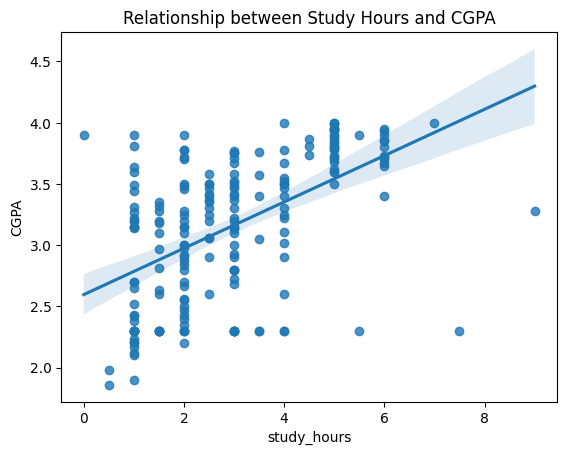

In [85]:
sns.regplot(x='study_hours', y='CGPA', data=responses)
plt.title('Relationship between Study Hours and CGPA')
plt.xlabel('study_hours')
plt.ylabel('CGPA')
plt.show()


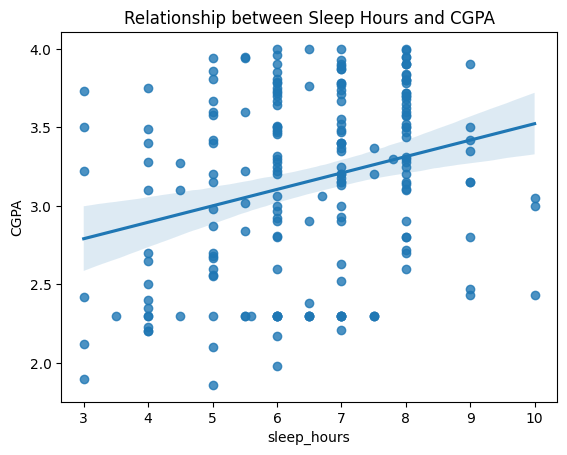

In [86]:
sns.regplot(x='sleep_hours', y='CGPA', data=responses)
plt.title('Relationship between Sleep Hours and CGPA')
plt.xlabel('sleep_hours')
plt.ylabel('CGPA')
plt.show()


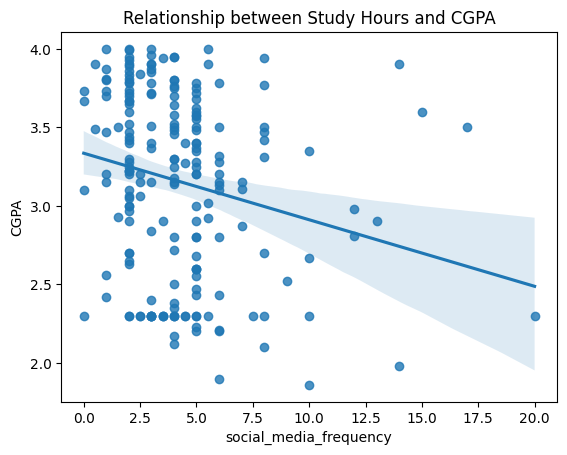

In [87]:
sns.regplot(x='social_media_frequency', y='CGPA', data=responses)
plt.title('Relationship between Study Hours and CGPA')
plt.xlabel('social_media_frequency')
plt.ylabel('CGPA')
plt.show()


In [88]:
responses['study_habits_score'] = (responses['class_attendance'].map({'always': 3, 'mostly': 2, 'sometimes': 1, 'rarely': 0, 'never': 0}) +
                                   responses['study_alone'].map({'alone': 0, 'with friends': 1, 'with a tutor': 2}) +
                                   responses['help_frequency'].map({'never': 0, 'sometimes': 1, 'often': 2, 'always': 3}) +
                                   responses['use_study_aids'].map({True: 1, False: 0}))

study_habits_cgpa = responses.groupby('study_habits_score')['CGPA'].mean()


<Axes: xlabel='study_hours', ylabel='CGPA'>

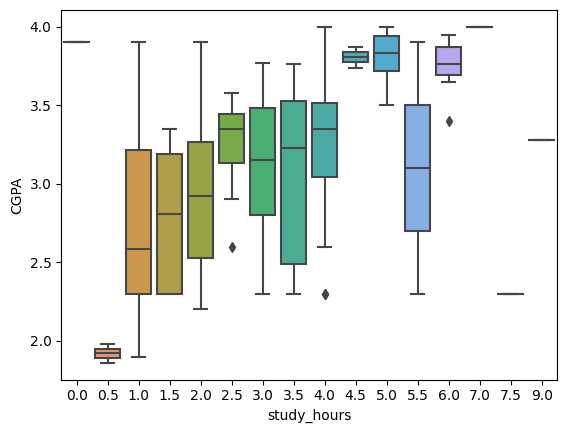

In [89]:
import seaborn as sns

# Relationship between study hours and CGPA
sns.boxplot(x='study_hours', y='CGPA', data=responses)



<Axes: xlabel='study_time', ylabel='CGPA'>

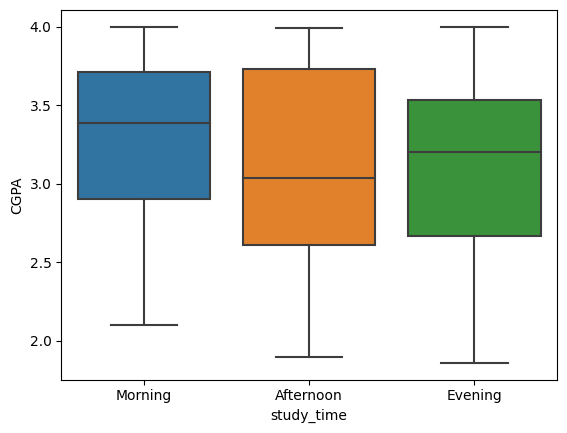

In [90]:
# Relationship between study time and CGPA
sns.boxplot(x='study_time', y='CGPA', data=responses)



<Axes: xlabel='exercise_frequency', ylabel='CGPA'>

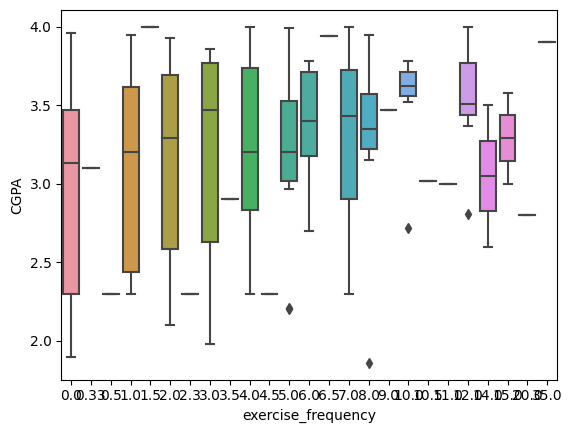

In [91]:
# Relationship between exercise frequency and CGPA
sns.boxplot(x='exercise_frequency', y='CGPA', data=responses)



<Axes: xlabel='play_video_games', ylabel='CGPA'>

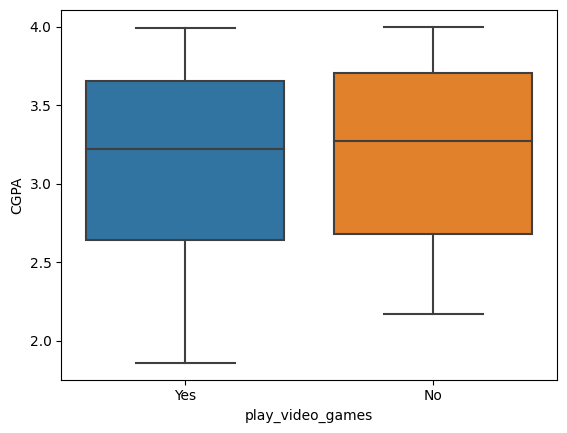

In [92]:
# Relationship between video game play and CGPA
sns.boxplot(x='play_video_games', y='CGPA', data=responses)



<Axes: xlabel='watch_tv', ylabel='CGPA'>

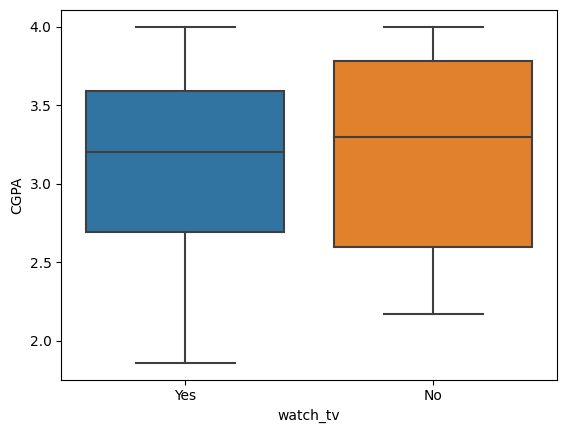

In [93]:
# Relationship between TV watching and CGPA
sns.boxplot(x='watch_tv', y='CGPA', data=responses)



<Axes: xlabel='tv_genre', ylabel='CGPA'>

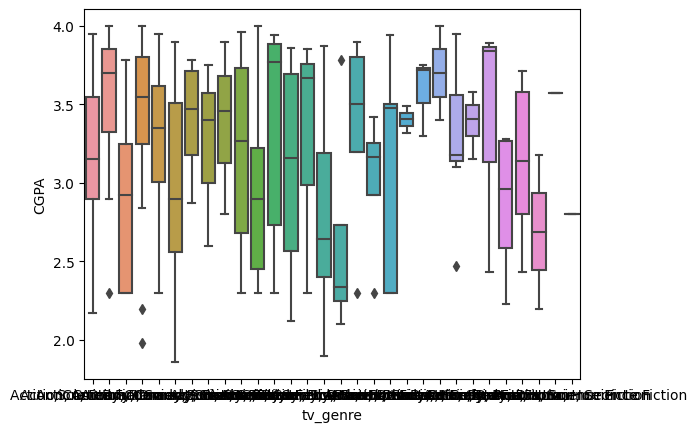

In [94]:
# Relationship between TV genre and CGPA
sns.boxplot(x='tv_genre', y='CGPA', data=responses)



<Axes: xlabel='sleep_hours', ylabel='CGPA'>

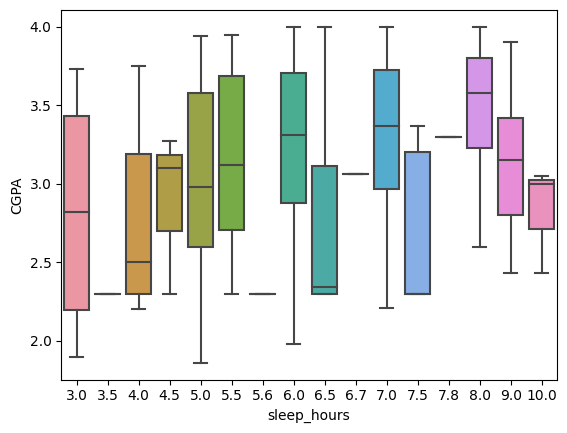

In [95]:
# Relationship between sleep hours and CGPA
sns.boxplot(x='sleep_hours', y='CGPA', data=responses)




<Axes: xlabel='social_media_frequency', ylabel='CGPA'>

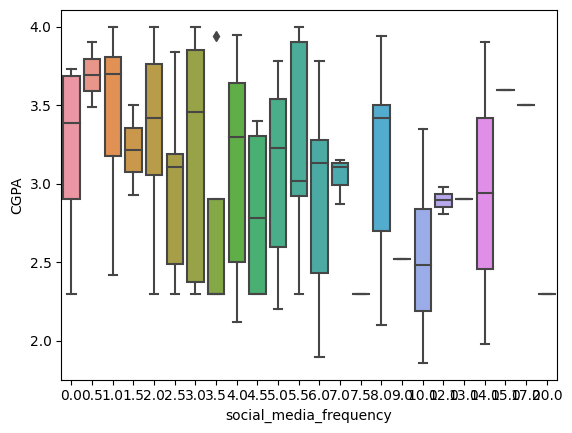

In [96]:
# Relationship between social media frequency and CGPA
sns.boxplot(x='social_media_frequency', y='CGPA', data=responses)



<Axes: xlabel='part_time_job', ylabel='CGPA'>

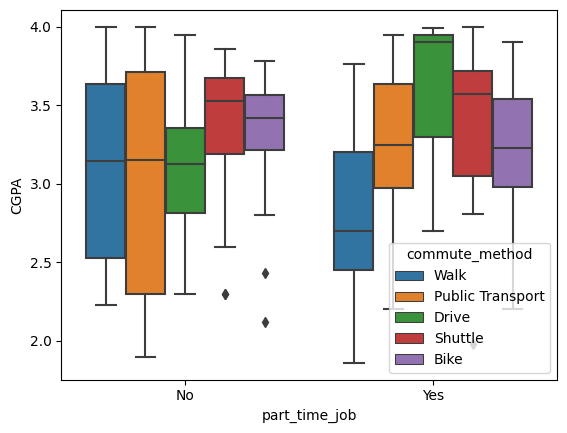

In [97]:

# Relationship between part-time job/internship and commute method with CGPA
sns.boxplot(x='part_time_job', y='CGPA', hue='commute_method', data=responses)

C:\Users\HP\AppData\Local\Temp\ipykernel_6268\2342793043.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = responses.corr()


<Axes: >

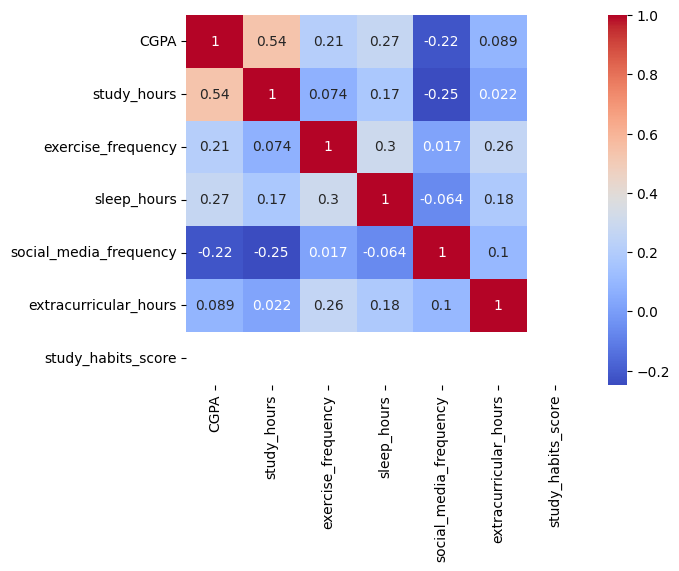

In [98]:
import seaborn as sns

# Create a correlation matrix
corr_matrix = responses.corr()

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


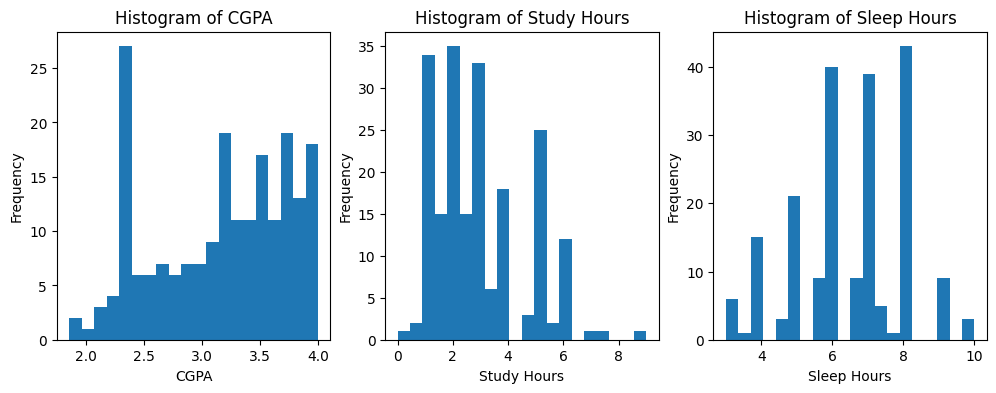

In [99]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot histograms of CGPA, study hours, and sleep hours
axs[0].hist(responses['CGPA'], bins=20)
axs[0].set_xlabel('CGPA')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of CGPA')

axs[1].hist(responses['study_hours'], bins=20)
axs[1].set_xlabel('Study Hours')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Study Hours')

axs[2].hist(responses['sleep_hours'], bins=20)
axs[2].set_xlabel('Sleep Hours')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram of Sleep Hours')

plt.show()
